In [198]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hespress/stories_faits-divers.csv
/kaggle/input/hespress/comments_marocains-du-monde.csv
/kaggle/input/hespress/stories_art-et-culture.csv
/kaggle/input/hespress/comments_regions.csv
/kaggle/input/hespress/comments_orbites.csv
/kaggle/input/hespress/stories_regions.csv
/kaggle/input/hespress/comments_art-et-culture.csv
/kaggle/input/hespress/stories_sport.csv
/kaggle/input/hespress/stories_medias.csv
/kaggle/input/hespress/comments_economie.csv
/kaggle/input/hespress/comments_medias.csv
/kaggle/input/hespress/stories_economie.csv
/kaggle/input/hespress/comments_sport.csv
/kaggle/input/hespress/comments_politique.csv
/kaggle/input/hespress/stories_tamazight.csv
/kaggle/input/hespress/stories_societe.csv
/kaggle/input/hespress/stories_orbites.csv
/kaggle/input/hespress/comments_societe.csv
/kaggle/input/hespress/stories_politique.csv
/kaggle/input/hespress/stories_marocains-du-monde.csv
/kaggle/input/hespress/comments_faits-divers.csv
/kaggle/input/hespress/comments_tamazig

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Corrected matplotlib import statement
import seaborn as sns  # Corrected seaborn import statement

In [200]:
import pandas as pd

# List of file paths for stories and comments CSV files
stories_files = [
    "/kaggle/input/hespress/stories_faits-divers.csv",
    "/kaggle/input/hespress/stories_art-et-culture.csv",
    "/kaggle/input/hespress/stories_regions.csv",
    "/kaggle/input/hespress/stories_orbites.csv",
    "/kaggle/input/hespress/stories_sport.csv",
    "/kaggle/input/hespress/stories_medias.csv",
    "/kaggle/input/hespress/stories_economie.csv",
    "/kaggle/input/hespress/stories_tamazight.csv",
    "/kaggle/input/hespress/stories_societe.csv",
    "/kaggle/input/hespress/stories_politique.csv",
    "/kaggle/input/hespress/stories_marocains-du-monde.csv"
]

# Read all stories CSV files and concatenate them into a single DataFrame
stories_dfs = []
for file in stories_files:
    df = pd.read_csv(file)
    stories_dfs.append(df)

stories_df = pd.concat(stories_dfs)


In [201]:
stories_df.head(2)

,Unnamed: 0,...,topic
0,0,...,faits-divers
1,1,...,faits-divers


In [202]:
df=stories_df.copy()

In [203]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)


In [204]:
df.head()

,title,...,topic
0,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",...,faits-divers
1,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",...,faits-divers
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,...,faits-divers
3,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",...,faits-divers
4,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",...,faits-divers


In [205]:
print(df.nunique())

title     10934
date      10942
author      874
story     10996
topic        11
dtype: int64


In [206]:
print(data.isnull().sum())

title          0
date           0
author         0
story          0
topic          0
day            0
month          0
year           0
time           0
day_of_week    0
author_name    0
dtype: int64


In [207]:
df['date']

0      الجمعة 02 أكتوبر 2020 - 20:08
1      الجمعة 02 أكتوبر 2020 - 19:37
2      الجمعة 02 أكتوبر 2020 - 18:35
3      الجمعة 02 أكتوبر 2020 - 14:20
4      الجمعة 02 أكتوبر 2020 - 10:05
5      الجمعة 02 أكتوبر 2020 - 09:03
6      الجمعة 02 أكتوبر 2020 - 06:03
7      الجمعة 02 أكتوبر 2020 - 05:15
8      الجمعة 02 أكتوبر 2020 - 03:06
9      الخميس 01 أكتوبر 2020 - 21:15
10     الخميس 01 أكتوبر 2020 - 16:35
11     الخميس 01 أكتوبر 2020 - 15:33
                   ...              
988     الأربعاء 16 ماي 2018 - 06:00
989     الثلاثاء 15 ماي 2018 - 23:00
990     الثلاثاء 15 ماي 2018 - 19:00
991     الثلاثاء 15 ماي 2018 - 06:00
992      الاثنين 14 ماي 2018 - 10:55
993      الاثنين 14 ماي 2018 - 06:00
994        الأحد 13 ماي 2018 - 06:00
995        السبت 12 ماي 2018 - 23:25
996        السبت 12 ماي 2018 - 06:00
997       الجمعة 11 ماي 2018 - 06:00
998       الخميس 10 ماي 2018 - 06:00
999     الأربعاء 09 ماي 2018 - 06:00
Name: date, Length: 11000, dtype: object

In [208]:
# Convert the 'date' column to string type
df['date'] = df['date'].astype(str)

# Extract day, month, year, and time from the date strings using regex
date_parts = df['date'].str.extract(r'(\d{2})\s(.+)\s(\d{4}) - (\d{2}:\d{2})')

# Update the DataFrame with the extracted date parts
df[['day', 'month', 'year', 'time']] = date_parts

# Convert day, month, and year columns to numeric data types
df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['month'] = df['month'].map(arabic_month_mapping)
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with missing or invalid values (e.g., non-numeric month names)
df = df.dropna(subset=['day', 'month', 'year'], how='any')

# Convert day, month, year, and time columns to integers
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Combine 'day', 'month', 'year', and 'time' columns to form a new 'date' column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Optionally, you can extract the day of the week as well
df['day_of_week'] = df['date'].dt.day_name()

# Drop the intermediate columns 'day', 'month', 'year', and 'time'
# df = df.drop(columns=['day', 'month', 'year', 'time'])

# Display the DataFrame with the new 'date' column and 'day_of_week' column
print(df['date'])

0     2020-10-02
1     2020-10-02
2     2020-10-02
3     2020-10-02
4     2020-10-02
5     2020-10-02
6     2020-10-02
7     2020-10-02
8     2020-10-02
9     2020-10-01
10    2020-10-01
11    2020-10-01
         ...    
988   2018-05-16
989   2018-05-15
990   2018-05-15
991   2018-05-15
992   2018-05-14
993   2018-05-14
994   2018-05-13
995   2018-05-12
996   2018-05-12
997   2018-05-11
998   2018-05-10
999   2018-05-09
Name: date, Length: 6482, dtype: datetime64[ns]


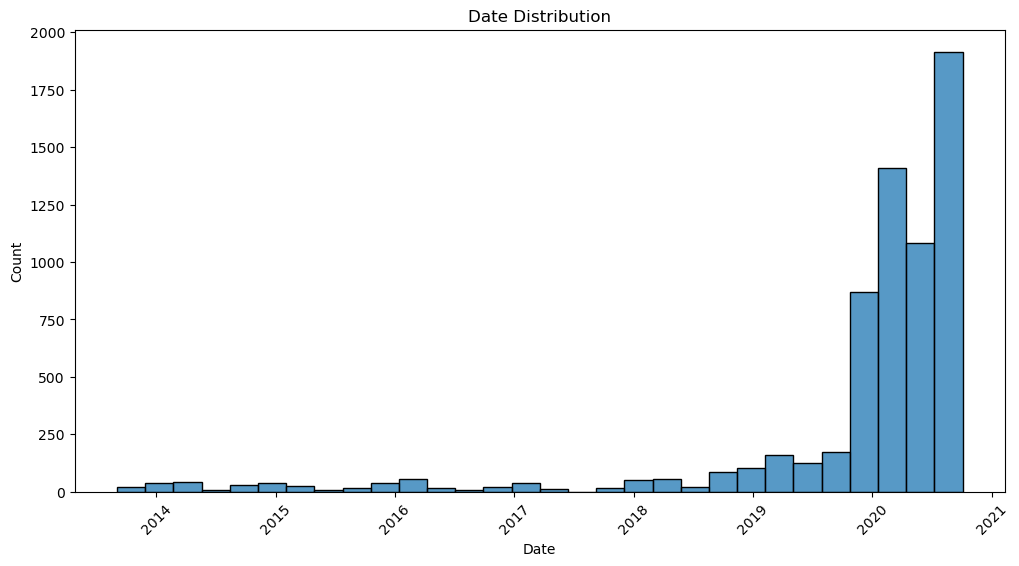

In [209]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='date', bins=30)
plt.title('Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [210]:
df

,title,...,day_of_week
0,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",...,Friday
1,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",...,Friday
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,...,Friday
3,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",...,Friday
4,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",...,Friday
5,"تلميذة تتهم ""زوج"" أمها بالاعتداء الجنسي بزاكورة",...,Friday
6,"مريض يشكو آلام السرطان و""طرد"" مشفى بأكادير",...,Friday
7,"الدرك الملكي يتصدى لترويج ""ماء الحياة"" بتادلة",...,Friday
8,"""دعارة التدليك"" تسقط 4 أشخاص بمدينة مراكش",...,Friday
...,...,...,...


In [211]:
import pandas as pd
import re

def remove_specific_punctuation_and_diacritics(text):
    punctuation_marks = ['،', '(', ')','|','-','"']  # Add any other specific punctuation marks you want to remove
    diacritics = 'ًَ'  # Add any other diacritics you want to remove

    for mark in punctuation_marks:
        text = re.sub(re.escape(mark), '', text)

    text = re.sub('[' + re.escape(diacritics) + ']', '', text)

    return text

# Sample data
data =df['title']

# Apply the function to clean the 'author' column
df['title'] = df['title'].apply(remove_specific_punctuation_and_diacritics)

# Display the DataFrame with the cleaned 'author' column
print(df['title'])


0               شهادة طبيب جراح تورط قنصلا بتر أصبع مسنة
1               إحباط تهريب أكثر من طن من الحشيش بأكادير
2             كمين أمن الصويرة يسقط شبكة هجرة غير نظامية
3          تلميذة زاكورة تتهم زوج أختها باستغلالها جنسيا
4            أحجار كريمة مزيفة تورط أشخاصا بمدينة أكادير
5          تلميذة تتهم زوج أمها بالاعتداء الجنسي بزاكورة
6               مريض يشكو آلام السرطان وطرد مشفى بأكادير
7            الدرك الملكي يتصدى لترويج ماء الحياة بتادلة
8                دعارة التدليك تسقط 4 أشخاص بمدينة مراكش
9             توقيف مشتبه فيه بقتل أربعيني نواحي العرائش
10              درك ميدلت يحجز مخدرات وأسلحة نارية بوزان
11           التغرير بقاصر يوقع بشاب في قبضة أمن المضيق‎
                             ...                        
988    الحسين الحسناوي .. مغربي يشرف على مشاريع تعليم...
989    مجلس الجالية يستعرض بالرباط الوضعية القانونية ...
990    تدريس أبناء الجالية .. الإفراج عن أساتذة العرب...
991    لمياء حماني .. مغربية من السماء إلى الأرض في م...
992            الاحتيال يعيد 54

In [212]:
import pandas as pd
import re

def remove_specific_punctuation_and_diacritics(text):
    punctuation_marks = ['،', '(', ')','|','-']  # Add any other specific punctuation marks you want to remove
    diacritics = 'ًَ'  # Add any other diacritics you want to remove

    for mark in punctuation_marks:
        text = re.sub(re.escape(mark), '', text)

    text = re.sub('[' + re.escape(diacritics) + ']', '', text)

    return text

# Sample data
data =df['author']

# Apply the function to clean the 'author' column
df['author'] = df['author'].apply(remove_specific_punctuation_and_diacritics)

# Display the DataFrame with the cleaned 'author' column
print(df['author'])


0                          هسبريس من الدار البيضاء
1                            رشيد بيجيكن من أكادير
2                          ابراهيم مغراوي من مراكش
3                                 هسبريس من زاكورة
4                            رشيد بيجيكن من أكادير
5                                 هسبريس من زاكورة
6                            رشيد بيجيكن من أكادير
7                                        حميد رزقي
8                          ابراهيم مغراوي من مراكش
9                                 هسبريس من الرباط
10                                  محمد ايت حساين
11                                هسبريس من الرباط
                          ...                     
988                  هسبريس ـ ط.العاطفي  أ.الخياري
989    هسبريس  عبد السلام الشامخ صور: منير محيمدات
990                     هسبريس  فاطمة الزهراء جبور
991                  هسبريس ـ ط.العاطفي  أ.الخياري
992                               هسبريس من الرباط
993                  هسبريس ـ ط.العاطفي  أ.الخياري
994                  هسبريس ـ ط

In [213]:
import pandas as pd

# يفترض أن لديك DataFrame يسمى df ويحتوي على عمود 'author'

# تعريف دالة لاستخراج اسم المؤلف
def extract_author_name(author):
    if 'من' in author:
        return author.split('من')[1].strip()
    elif 'ـ' in author:
        return author.split('ـ')[0].strip()
    else:
        return 'هسبريس'
        
df['author_name'] = df['author'].apply(extract_author_name)
df['author_name']

0      الدار البيضاء
1             أكادير
2              مراكش
3             زاكورة
4             أكادير
5             زاكورة
6             أكادير
7             هسبريس
8              مراكش
9             الرباط
10            هسبريس
11            الرباط
           ...      
988           هسبريس
989       ير محيمدات
990           هسبريس
991           هسبريس
992           الرباط
993           هسبريس
994           هسبريس
995           الرباط
996           هسبريس
997           هسبريس
998           هسبريس
999           هسبريس
Name: author_name, Length: 6482, dtype: object

In [214]:
import pandas as pd
import re

def remove_specific_punctuation_and_diacritics(text):
    punctuation_marks = ['،', '(', ')','|','-']  # Add any other specific punctuation marks you want to remove
    diacritics = 'ًَ'  # Add any other diacritics you want to remove

    for mark in punctuation_marks:
        text = re.sub(re.escape(mark), '', text)

    text = re.sub('[' + re.escape(diacritics) + ']', '', text)

    return text

# Sample data
data =df['topic']

# Apply the function to clean the 'author' column
df['topic'] = df['topic'].apply(remove_specific_punctuation_and_diacritics)

# Display the DataFrame with the cleaned 'author' column
print(df['topic'])


0           faitsdivers
1           faitsdivers
2           faitsdivers
3           faitsdivers
4           faitsdivers
5           faitsdivers
6           faitsdivers
7           faitsdivers
8           faitsdivers
9           faitsdivers
10          faitsdivers
11          faitsdivers
             ...       
988    marocainsdumonde
989    marocainsdumonde
990    marocainsdumonde
991    marocainsdumonde
992    marocainsdumonde
993    marocainsdumonde
994    marocainsdumonde
995    marocainsdumonde
996    marocainsdumonde
997    marocainsdumonde
998    marocainsdumonde
999    marocainsdumonde
Name: topic, Length: 6482, dtype: object


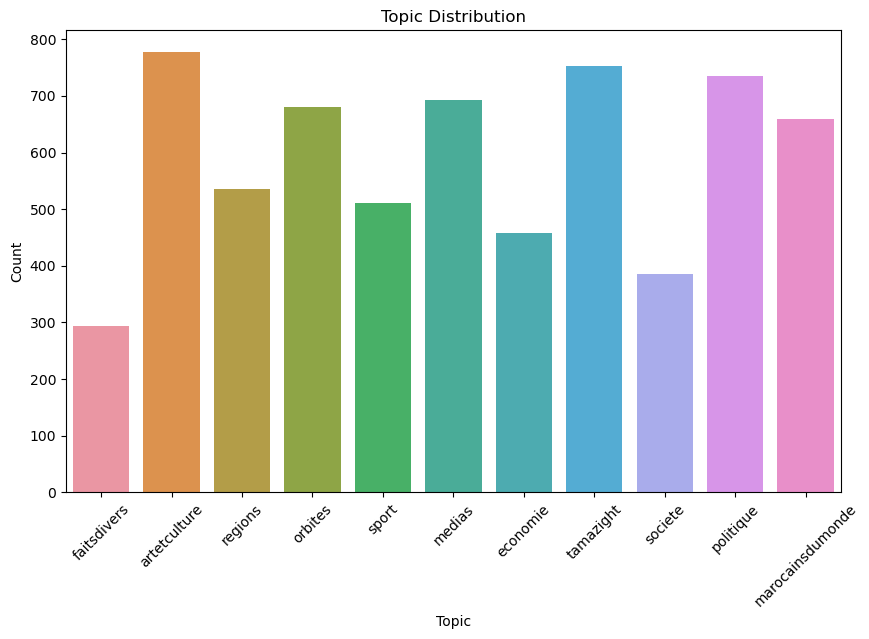

In [215]:
# Visualize the distribution of the 'topic' column
plt.figure(figsize=(10, 6))
sns.countplot(x='topic', data=df)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

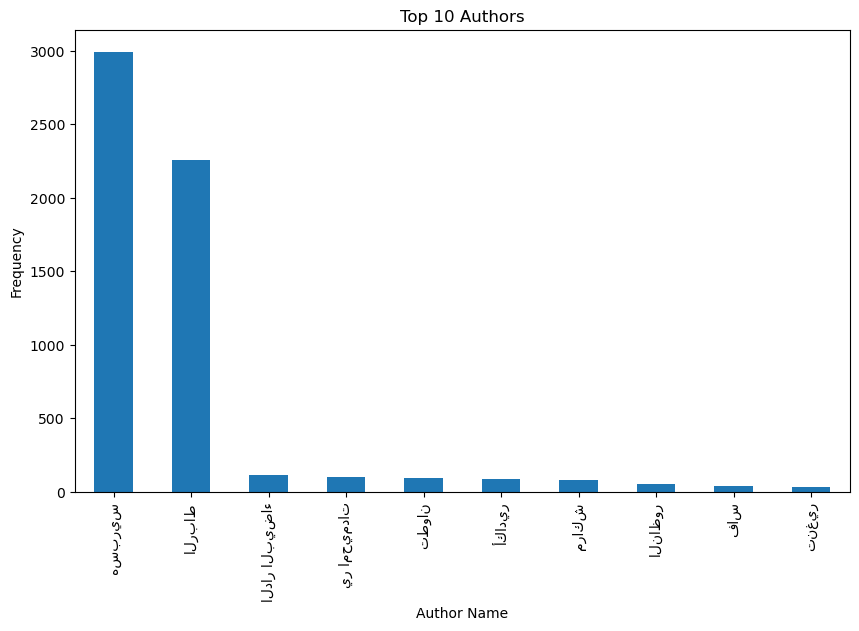

هسبريس           2991
الرباط           2258
الدار البيضاء     114
ير امحيمدات        98
تطوان              96
أكادير             89
مراكش              81
الناظور            53
فاس                39
تنغير              31
Name: author_name, dtype: int64

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have DataFrame df with the 'author_name' column

# Get the top 10 most frequent author names
top_10_authors = df['author_name'].value_counts().head(10)

# Create a bar plot for the top 10 authors
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Author Name')
plt.ylabel('Frequency')
plt.title('Top 10 Authors')
plt.show()
df['author_name'].value_counts().head(10)

In [217]:
df

,title,...,author_name
0,شهادة طبيب جراح تورط قنصلا بتر أصبع مسنة,...,الدار البيضاء
1,إحباط تهريب أكثر من طن من الحشيش بأكادير,...,أكادير
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,...,مراكش
3,تلميذة زاكورة تتهم زوج أختها باستغلالها جنسيا,...,زاكورة
4,أحجار كريمة مزيفة تورط أشخاصا بمدينة أكادير,...,أكادير
5,تلميذة تتهم زوج أمها بالاعتداء الجنسي بزاكورة,...,زاكورة
6,مريض يشكو آلام السرطان وطرد مشفى بأكادير,...,أكادير
7,الدرك الملكي يتصدى لترويج ماء الحياة بتادلة,...,هسبريس
8,دعارة التدليك تسقط 4 أشخاص بمدينة مراكش,...,مراكش
...,...,...,...


In [218]:
import pandas as pd
import re

def remove_specific_punctuation_and_diacritics(text):
    punctuation_marks = ['،', '(', ')','|','-']  # Add any other specific punctuation marks you want to remove
    diacritics = 'ًَ'  # Add any other diacritics you want to remove

    for mark in punctuation_marks:
        text = re.sub(re.escape(mark), '', text)

    text = re.sub('[' + re.escape(diacritics) + ']', '', text)

    return text

# Sample data
data =df['story']

# Apply the function to clean the 'author' column
df['story'] = df['story'].apply(remove_specific_punctuation_and_diacritics)

# Display the DataFrame with the cleaned 'author' column
print(df['story'])


0      قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...
1      تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...
2      أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...
3      كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...
4      تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...
5      أفادت مصادر هسبريس بأن الوكيل العام للملك لدى ...
6      دقت جمعية "أياد نظيفة ضد الفساد" بمدينة إنزكان...
7      تمكّنت عناصر الدرك الملكي بالمركز الترابي قصبة...
8      أوقفت فرقة من ولاية أمن مراكش الأربعاء بوكر مع...
9      تمكنت عناصر المركز الترابي للدرك الملكي بني كر...
10     تمكنت مصالح المركز القضائي للدرك الملكي بسرية ...
11     أوقفت عناصر فرقة الشرطة القضائية بمنطقة أمن ال...
                             ...                        
988    عمل الحسين الحسناوي على تعديل أهدافه بتغيّر مو...
989    في سياق التحضير للمؤتمر الدولي حول الهجرة والت...
990    أفْرجت وزارة التربية الوطنية عن اللائحة النهائ...
991    تخطت لمياء حماني 15 عاما من العيش خارج المملكة...
992    نظم معهد Compus Espagne 

In [219]:
df

,title,...,author_name
0,شهادة طبيب جراح تورط قنصلا بتر أصبع مسنة,...,الدار البيضاء
1,إحباط تهريب أكثر من طن من الحشيش بأكادير,...,أكادير
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,...,مراكش
3,تلميذة زاكورة تتهم زوج أختها باستغلالها جنسيا,...,زاكورة
4,أحجار كريمة مزيفة تورط أشخاصا بمدينة أكادير,...,أكادير
5,تلميذة تتهم زوج أمها بالاعتداء الجنسي بزاكورة,...,زاكورة
6,مريض يشكو آلام السرطان وطرد مشفى بأكادير,...,أكادير
7,الدرك الملكي يتصدى لترويج ماء الحياة بتادلة,...,هسبريس
8,دعارة التدليك تسقط 4 أشخاص بمدينة مراكش,...,مراكش
...,...,...,...


In [220]:
df['story'][0]

0    قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...
0    وجه "بيت الشعر في المغرب" إلى وزير الثقافة وال...
0    بلغ مؤشر الإصابة بفيروس كورونا في آخر 24 ساعة ...
0    تُبيّن التصريحات الأخيرة للأمين العام لجبهة ال...
0    رغم أن المستوى التقني العام لمباريات الدوري من...
0    قراءة مواد بعض الجرائد الخاصة بنهاية الأسبوع ن...
0    قال محمد أمكراز وزير الشغل والإدماج المهني إن ...
0    قالت وزارة التربية الوطنية والتكوين المهني وال...
0    كشفت معطيات وزارة الصحة اليوم الجمعة تسجيل 252...
0    أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...
0    بعد أكثر من ستّة أشهر من الإغلاق لحُدودهما الب...
Name: story, dtype: object

# model

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the data
data = df

# Define a function to preprocess the text data
def preprocess_text(text):
    # Remove non-Arabic characters, numbers, and punctuation
    cleaned_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(cleaned_text)
    
    # Remove stopwords
    arabic_stopwords = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in tokens if token.lower() not in arabic_stopwords]
    
    # Join the tokens back to form a cleaned text
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

# Apply the preprocessing function to the 'title' and 'story' columns
data['title'] = data['title'].apply(preprocess_text)
data['story'] = data['story'].apply(preprocess_text)

# Feature Engineering: Use TF-IDF for text features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the max_features as needed
X = vectorizer.fit_transform(data['title'] + " " + data['story'])  # Combine title and story

# Target variable
y = data['topic']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [224]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [225]:
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    artetculture       0.79      0.88      0.83       157
        economie       0.81      0.75      0.78       105
     faitsdivers       0.88      0.88      0.88        72
marocainsdumonde       0.74      0.78      0.76       120
          medias       0.92      0.82      0.87       161
         orbites       0.68      0.65      0.66       127
       politique       0.73      0.86      0.79       134
         regions       0.77      0.80      0.78       115
         societe       0.78      0.47      0.59        68
           sport       0.96      0.94      0.95        99
       tamazight       0.93      0.98      0.95       139

        accuracy                           0.81      1297
       macro avg       0.82      0.80      0.80      1297
    weighted avg       0.82      0.81      0.81      1297



In [226]:
# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.8134155744024673


In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Perform k-fold cross-validation and get predictions
y_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5)

# Evaluate the model's performance using cross-validati  on results
print("Cross-Validation Classification Report:")
print(classification_report(y_train, y_pred_cv))

# Calculate overall accuracy using cross-validation results
accuracy_cv = accuracy_score(y_train, y_pred_cv)
print("Cross-Validation Overall Accuracy:", accuracy_cv)

# Now, you can also evaluate the model on the test set as before
classifier.fit(X_train, y_train)
y_pred_test = classifier.predict(X_test)

print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate overall accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Overall Accuracy:", accuracy_test)

Cross-Validation Classification Report:
                  precision    recall  f1-score   support

    artetculture       0.79      0.85      0.82       620
        economie       0.76      0.73      0.75       353
     faitsdivers       0.83      0.90      0.86       222
marocainsdumonde       0.80      0.83      0.82       540
          medias       0.91      0.82      0.86       531
         orbites       0.66      0.60      0.63       553
       politique       0.71      0.83      0.77       602
         regions       0.73      0.81      0.77       421
         societe       0.78      0.40      0.53       318
           sport       0.95      0.97      0.96       412
       tamazight       0.91      0.96      0.93       613

        accuracy                           0.80      5185
       macro avg       0.80      0.79      0.79      5185
    weighted avg       0.80      0.80      0.80      5185

Cross-Validation Overall Accuracy: 0.8015429122468659
Test Set Classification Report:
 

In [228]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[138   0   0   7   0   4   1   1   1   1   4]
 [  1  79   1   7   0   6   6   5   0   0   0]
 [  0   1  63   0   1   2   0   5   0   0   0]
 [  6   1   2  93   3   3   9   0   2   1   0]
 [  6   4   0   4 132   8   2   0   1   1   3]
 [ 13   2   1   8   3  82  12   4   0   0   2]
 [  1   3   1   2   0   8 115   1   1   0   2]
 [  4   4   4   1   1   2   3  92   3   1   0]
 [  2   4   0   3   3   5   8  11  32   0   0]
 [  3   0   0   0   1   0   1   0   1  93   0]
 [  0   0   0   0   0   1   1   1   0   0 136]]
